This notebook runs Bayes Classifier on our cleaned data

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [2]:
df_final = pd.read_csv('../Data/clean_data.csv')
df_final.head(5)

,abit,able,absence,absolute,absolutely,absurd,abundant,ac,accept,acceptable,...,yri,yuk,yummy,yvonna,zero,ziggo,zip,zipped,zone,Reviewer_Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
X = df_final.iloc[:, :-1] #grab all cols except for prediction col
y = df_final.iloc[:, -1] # grab the prediction col

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1340, 4334)
(660, 4334)
(1340,)
(660,)


In [6]:
model = MultinomialNB(alpha = 1) #al
model.fit(X_train, Y_train);
pred = model.predict(X_test)

<class 'numpy.ndarray'>
Accuracy Score:  0.7651515151515151
F1 Score:  0.848780487804878


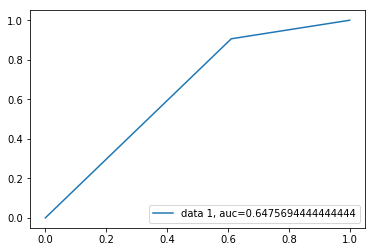

In [35]:
#import scikitplot as skplt
import matplotlib
import matplotlib.pyplot as plt
print(type(Y_test.values))
accuracy_score = metrics.accuracy_score(Y_test.values, pred)
f1_score = metrics.f1_score(Y_test, pred)
fpr, tpr, thresh = metrics.roc_curve(Y_test, pred, pos_label=1, sample_weight=None)
print("Accuracy Score: " , str(accuracy_score))
print("F1 Score: " , str(f1_score))

#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# %matplotlib inline  
# plt.figure(figsize=(5,5))
# plt.plot(fpr,tpr,linewidth=2.0)
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.xlim([0,1])
# plt.ylim([0,1])
